In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import sklearn
import numpy as np

plt.style.use('ggplot')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [42]:
# open the tsv file
#data=pd.read_csv('yellowstone.tsv', sep='\t')

# save as csv
#data.to_csv('yellowstone.csv', index=False)

#This was only needed once to convert the tsv to csv

# EDA

In [43]:
data=pd.read_csv('yellowstone.csv')

data['datetime'] = pd.to_datetime(data['datetime'])

print(data.head())

  agency_cd       id            datetime timezone discharge discharge_quality  \
0      USGS  6295000 1994-10-01 01:00:00      MDT      4520            A:[91]   
1      USGS  6295000 1994-10-01 02:00:00      MDT      4550            A:[91]   
2      USGS  6295000 1994-10-01 03:00:00      MDT      4550            A:[91]   
3      USGS  6295000 1994-10-01 04:00:00      MDT      4550            A:[91]   
4      USGS  6295000 1994-10-01 05:00:00      MDT      4550            A:[91]   

   gage_height gage_height_quality  
0          NaN                 NaN  
1          NaN                 NaN  
2          NaN                 NaN  
3          NaN                 NaN  
4          NaN                 NaN  


/tmp/ipykernel_1252120/225636090.py:1: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('yellowstone.csv')


<Axes: xlabel='datetime'>

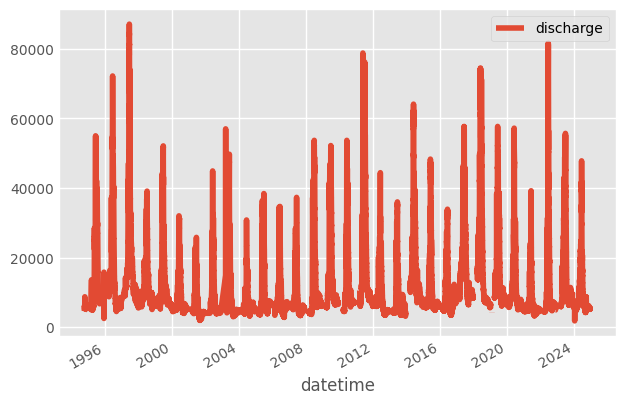

In [44]:
# Convert the discharge column to numeric, coercing errors to NaN
data['discharge'] = pd.to_numeric(data['discharge'], errors='coerce')

# Plot the data
data.plot(x='datetime', y='discharge')

In [45]:
data['year']=data['datetime'].dt.year

data.head()

,agency_cd,id,datetime,timezone,discharge,discharge_quality,gage_height,gage_height_quality,year
0,USGS,6295000,1994-10-01 01:00:00,MDT,4520.0,A:[91],NaN,NaN,1994
1,USGS,6295000,1994-10-01 02:00:00,MDT,4550.0,A:[91],NaN,NaN,1994
2,USGS,6295000,1994-10-01 03:00:00,MDT,4550.0,A:[91],NaN,NaN,1994
3,USGS,6295000,1994-10-01 04:00:00,MDT,4550.0,A:[91],NaN,NaN,1994
4,USGS,6295000,1994-10-01 05:00:00,MDT,4550.0,A:[91],NaN,NaN,1994


In [46]:
data.groupby(['year']).mean(numeric_only=True)

,id,discharge,gage_height
year,,,
1994,6295000.0,5814.791489,NaN
1995,6295000.0,15156.067002,NaN
1996,6295000.0,15998.582793,NaN
1997,6295000.0,20493.776412,NaN
1998,6295000.0,11557.353020,NaN
1999,6295000.0,12573.136541,NaN
2000,6295000.0,8438.070362,NaN
2001,6295000.0,6385.435328,NaN
2002,6295000.0,9192.893882,NaN


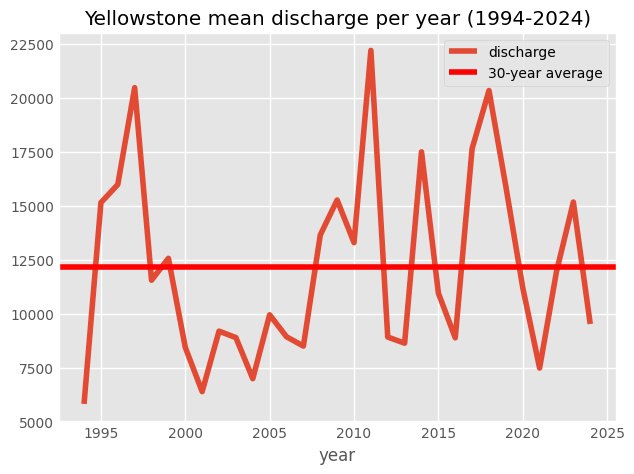

In [47]:
means = data.groupby(['year']).mean(numeric_only=True)
mean_discharge = means['discharge']
overall_mean = mean_discharge.mean()
mean_discharge.plot()
plt.axhline(y=overall_mean, color='red', label='30-year average')
plt.title("Yellowstone mean discharge per year (1994-2024)")
plt.plot(2024, mean_discharge[2024])
plt.legend()

In [48]:
data['year']

0         1994
1         1994
2         1994
3         1994
4         1994
          ... 
894518    2024
894519    2024
894520    2024
894521    2024
894522    2024
Name: year, Length: 894523, dtype: int32

In [49]:
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['day_of_year'] = data['datetime'].dt.dayofyear

In [50]:
year_2021 = data[data['year'] == 2021]
year_2022 = data[data['year'] == 2022]
year_2023 = data[data['year'] == 2023]
year_2024 = data[data['year'] == 2024]

In [51]:
year_2021

,agency_cd,id,datetime,timezone,discharge,discharge_quality,gage_height,gage_height_quality,year,month,day,day_of_year
758945,USGS,6295000,2021-01-01 00:00:00,MST,NaN,NaN,1.74,A,2021,1,1,1
758946,USGS,6295000,2021-01-01 00:15:00,MST,NaN,NaN,1.73,A,2021,1,1,1
758947,USGS,6295000,2021-01-01 00:30:00,MST,NaN,NaN,1.73,A,2021,1,1,1
758948,USGS,6295000,2021-01-01 00:45:00,MST,4330.0,A:e,1.73,A,2021,1,1,1
758949,USGS,6295000,2021-01-01 01:00:00,MST,NaN,NaN,1.74,A,2021,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
793560,USGS,6295000,2021-12-31 22:45:00,MST,NaN,NaN,1.63,A,2021,12,31,365
793561,USGS,6295000,2021-12-31 23:00:00,MST,NaN,NaN,1.64,A,2021,12,31,365
793562,USGS,6295000,2021-12-31 23:15:00,MST,NaN,NaN,1.65,A,2021,12,31,365
793563,USGS,6295000,2021-12-31 23:30:00,MST,NaN,NaN,1.66,A,2021,12,31,365


In [52]:
gage_height_2021 = year_2021[['day_of_year', 'gage_height']]
gage_height_2022 = year_2022[['day_of_year', 'gage_height']]
gage_height_2023 = year_2023[['day_of_year', 'gage_height']]
gage_height_2024 = year_2024[['day_of_year', 'gage_height']]

In [53]:
discharge_2021 = year_2021[['day_of_year', 'discharge']]
discharge_2022 = year_2022[['day_of_year', 'discharge']]
discharge_2023 = year_2023[['day_of_year', 'discharge']]
discharge_3_year = discharge_2021.merge(discharge_2022, on='day_of_year').merge(discharge_2023, on='day_of_year')
discharge_3_year.columns = ['day_of_year', 'discharge_2021', 'discharge_2022', 'discharge_2023']

Text(0.5, 0, 'Day of the year')

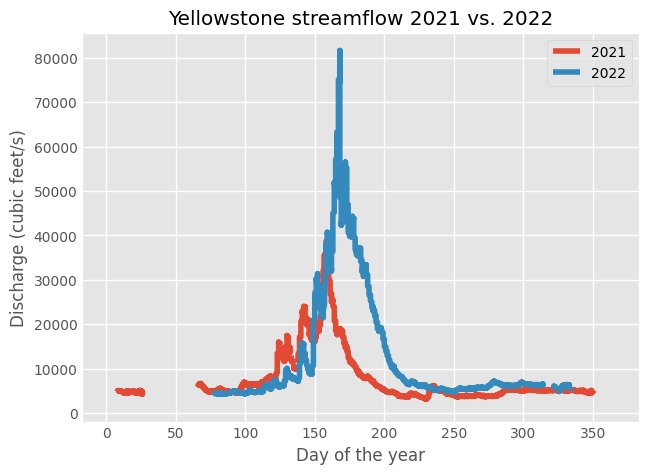

In [54]:
fig, ax = plt.subplots()
ax.plot(discharge_2021['day_of_year'], discharge_2021['discharge'], label='2021')
ax.plot(discharge_2022['day_of_year'], discharge_2022['discharge'], label='2022')
plt.legend()
plt.title('Yellowstone streamflow 2021 vs. 2022')
plt.ylabel('Discharge (cubic feet/s)')
plt.xlabel('Day of the year')

Text(0.5, 0, 'Day of the year')

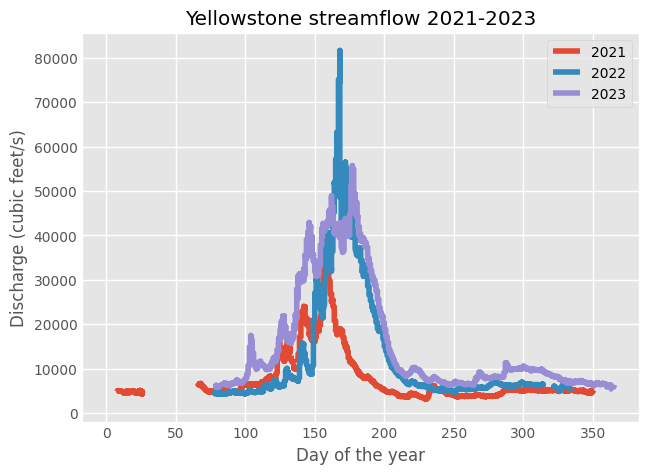

In [55]:
fig, ax = plt.subplots()
ax.plot(discharge_2021['day_of_year'], discharge_2021['discharge'], label='2021')
ax.plot(discharge_2022['day_of_year'], discharge_2022['discharge'], label='2022')
ax.plot(discharge_2023['day_of_year'], discharge_2023['discharge'], label='2023')
plt.legend()
plt.title('Yellowstone streamflow 2021-2023')
plt.ylabel('Discharge (cubic feet/s)')
plt.xlabel('Day of the year')

In [56]:
discharge=data['discharge'].to_frame()
discharge.index=data['datetime']

Text(0.5, 0, 'Date and Time(15 min intervals)')

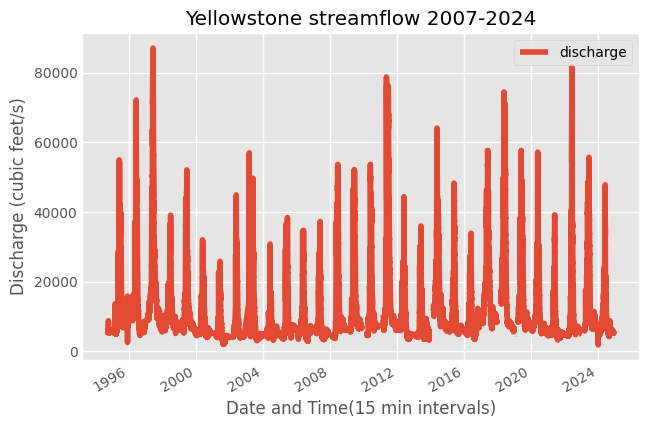

In [57]:

discharge.plot()
plt.title('Yellowstone streamflow 2007-2024')
plt.ylabel('Discharge (cubic feet/s)')
plt.xlabel('Date and Time(15 min intervals)')

In [58]:
discharge_2008 = discharge[(discharge.index >= '2008-01-01') & (discharge.index < '2009-01-01')]
discharge_2014 = discharge[(discharge.index >= '2014-01-01') & (discharge.index < '2015-01-01')]
discharge_2020 = discharge[(discharge.index >= '2020-01-01') & (discharge.index < '2021-01-01')]

Text(0.5, 0, 'Date')

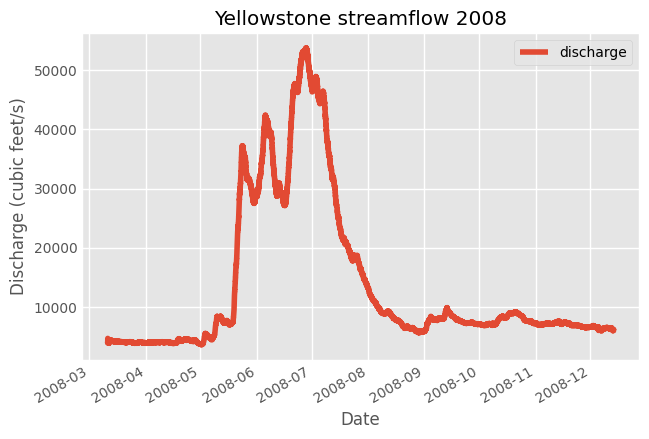

In [59]:
discharge_2008.plot()
plt.title('Yellowstone streamflow 2008')
plt.ylabel('Discharge (cubic feet/s)')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

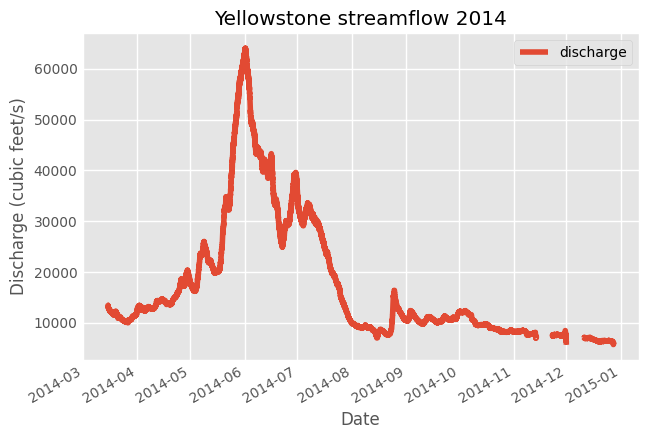

In [60]:
discharge_2014.plot()
plt.title('Yellowstone streamflow 2014')
plt.ylabel('Discharge (cubic feet/s)')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

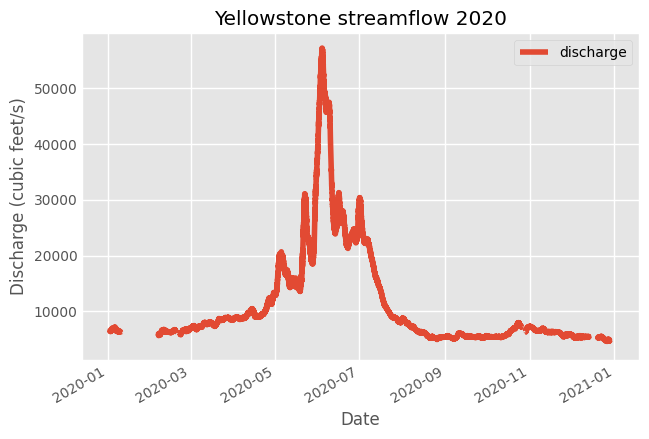

In [61]:
discharge_2020.plot()
plt.title('Yellowstone streamflow 2020')
plt.ylabel('Discharge (cubic feet/s)')
plt.xlabel('Date')

In [62]:
discharge['day_of_year']=discharge.index.day_of_year
discharge['week']=discharge.index.isocalendar().week.astype('int32')
discharge['month']=discharge.index.month
discharge['quarter']=discharge.index.quarter
discharge['year']=discharge.index.year

In [63]:
discharge_consolidated = discharge.copy()
discharge_consolidated = discharge_consolidated.groupby(['year', 'day_of_year']).first()

([<matplotlib.axis.XTick at 0x74a2c61ff140>,
 [Text(0, 0, '1'),
  Text(5, 0, '6'),
  Text(10, 0, '11'),
  Text(15, 0, '16'),
  Text(20, 0, '21'),
  Text(25, 0, '26'),
  Text(30, 0, '31'),
  Text(35, 0, '36'),
  Text(40, 0, '41'),
  Text(45, 0, '46'),
  Text(50, 0, '51')])

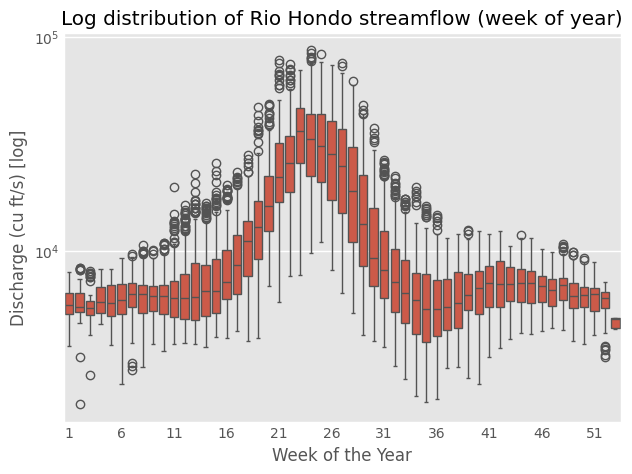

In [64]:
sns.boxplot(data=discharge_consolidated, x='week', y='discharge')
plt.ylabel('Discharge (cu ft/s) [log]')
plt.xlabel('Week of the Year')
plt.yscale('log')
plt.title('Log distribution of Rio Hondo streamflow (week of year)')

plt.xticks(range(0, 53, 5))

Text(0.5, 1.0, 'Log distribution of Yellowstone streamflow (month of year)')

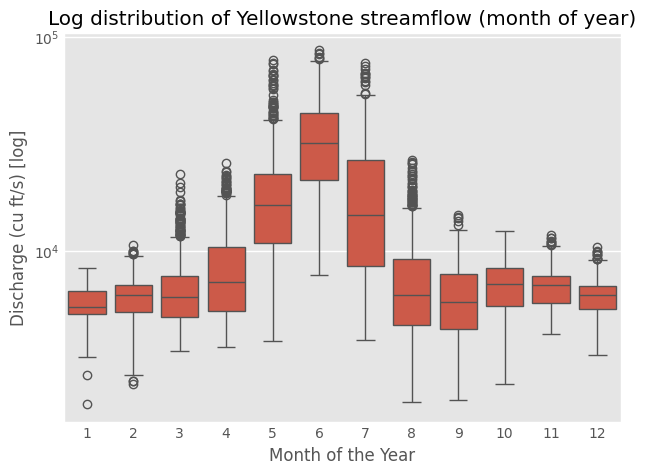

In [65]:
sns.boxplot(data=discharge_consolidated,x='month', y='discharge')
plt.ylabel('Discharge (cu ft/s) [log]')
plt.xlabel('Month of the Year')
plt.yscale('log')
plt.title('Log distribution of Yellowstone streamflow (month of year)')

# Prediction

In [66]:
train = discharge[discharge['year']<2023]
test = discharge[discharge['year']>=2023]

Text(0, 0.5, 'Discharge (cu ft/s)')

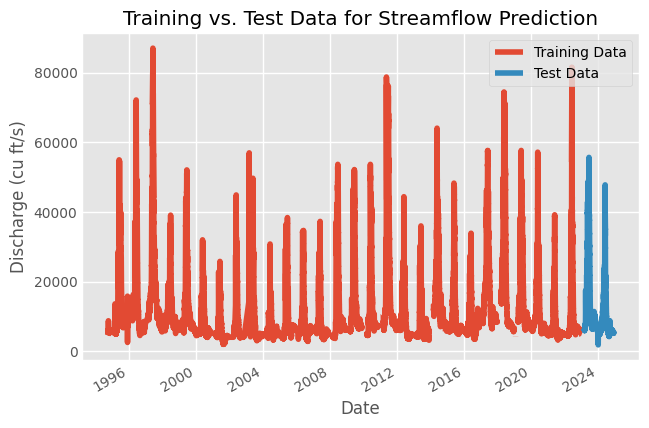

In [67]:
fig, ax = plt.subplots()
train['discharge'].plot(ax=ax)
test['discharge'].plot(ax=ax)
plt.legend(['Training Data', 'Test Data'])
plt.title('Training vs. Test Data for Streamflow Prediction')
plt.xlabel('Date')
plt.ylabel('Discharge (cu ft/s)')

In [68]:
features = ['month','week', 'day_of_year']
target = 'discharge'

x_train = train[features]
y_train = train[target]

x_test = test[features]
y_test = test[target]

In [69]:
# Remove NaN values from y_train and y_test
y_train = y_train.dropna()
y_test = y_test.dropna()

# Ensure x_train and x_test match the indices of y_train and y_test
x_train = x_train.loc[y_train.index]
x_test = x_test.loc[y_test.index]

regressor = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=100)
eval_set = [(x_train, y_train), (x_test, y_test)]
regressor.fit(x_train, y_train, eval_set=eval_set, verbose=20)

[0]	validation_0-rmse:9730.24441	validation_1-rmse:8130.39512
[20]	validation_0-rmse:7326.14761	validation_1-rmse:4515.76409
[40]	validation_0-rmse:7319.66675	validation_1-rmse:4507.41965
[60]	validation_0-rmse:7318.22190	validation_1-rmse:4507.24388
[80]	validation_0-rmse:7315.84517	validation_1-rmse:4509.10602
[100]	validation_0-rmse:7315.31778	validation_1-rmse:4510.50496
[120]	validation_0-rmse:7314.98098	validation_1-rmse:4510.52361
[135]	validation_0-rmse:7314.83700	validation_1-rmse:4510.49521


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=100,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
pd.set_option('mode.chained_assignment', None)

# Reindex x_test to match the index of test
x_test_reindexed = x_test.reindex(test.index)

# Make predictions
test['prediction'] = regressor.predict(x_test_reindexed)

Text(0.5, 1.0, 'Feature Importance')

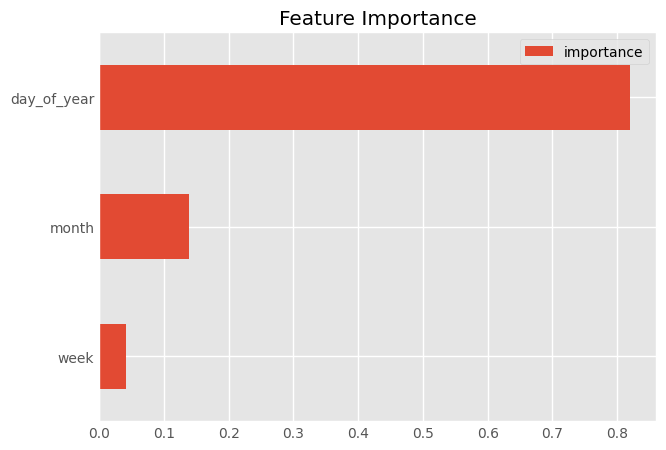

In [71]:
importance = pd.DataFrame(data=regressor.feature_importances_, index=regressor.feature_names_in_,
            columns=['importance'])
importance = importance.sort_values('importance')
importance.plot.barh()
plt.title('Feature Importance')

Text(0.5, 1.0, 'Model vs. 2023 Discharge Data')

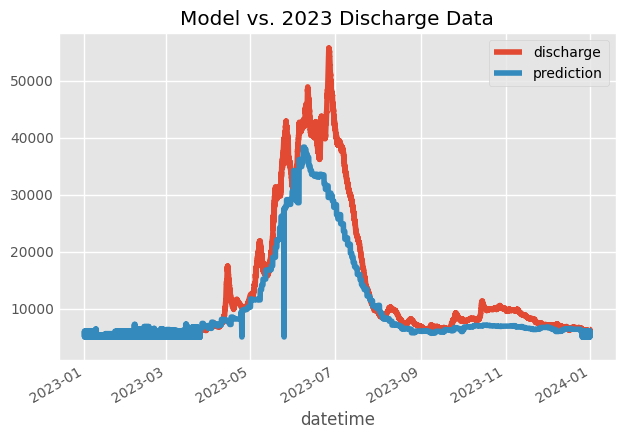

In [72]:
predicted_2023 = test[test['year'] == 2023]
predicted_2023.plot(y=['discharge', 'prediction'])
plt.title('Model vs. 2023 Discharge Data')

Text(0.5, 1.0, 'Model vs. 2024 Discharge Data')

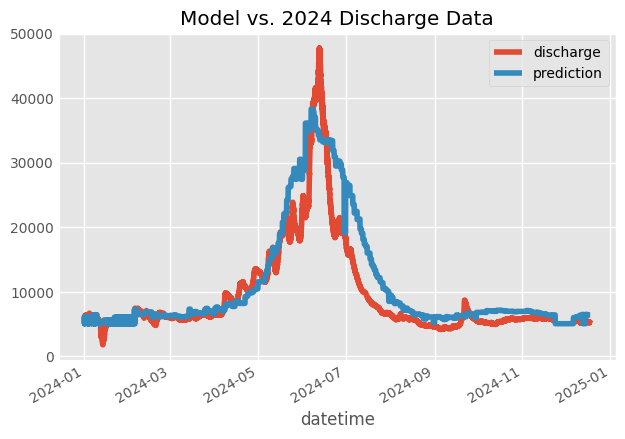

In [73]:
predicted_2024 = test[test['year'] == 2024]
predicted_2024.plot(y=['discharge', 'prediction'])
plt.title('Model vs. 2024 Discharge Data')